In [525]:
#import the dataset

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [526]:
# Read data from CSV file

ds = pd.read_csv('car_price_prediction_.csv')
ds

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model,Price
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X,26613.92
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series,14679.61
2,3,Audi,2013,4.5,Electric,Manual,181601,New,A4,44402.61
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y,86374.33
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang,73577.10
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5,61384.10
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3,24710.35
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta,29902.45
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,Q5,46085.67


In [527]:
#Data Cleaning

ds=ds.dropna(how="all" )
ds


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model,Price
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X,26613.92
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series,14679.61
2,3,Audi,2013,4.5,Electric,Manual,181601,New,A4,44402.61
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y,86374.33
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang,73577.10
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5,61384.10
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3,24710.35
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta,29902.45
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,Q5,46085.67


In [528]:
# Change the index to  Car ID
ds.set_index('Car ID', inplace=True)
ds

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model,Price
Car ID,,,,,,,,,
1,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X,26613.92
2,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series,14679.61
3,Audi,2013,4.5,Electric,Manual,181601,New,A4,44402.61
4,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y,86374.33
5,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang,73577.10
...,...,...,...,...,...,...,...,...,...
2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5,61384.10
2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3,24710.35
2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta,29902.45


## **Create a program to random sampling and find the descriptive statistics for the dependent variable(Price).**

In [529]:
#Q7
#systematic sampling and random desc stat

from matplotlib.colors import Normalize

def Desc_stat2(ds,var):

  mean=ds[var].mean()
  median=ds[var].median()
  mode=ds[var].mode()
  minimum=ds[var].min()
  maximum=ds[var].max()
  range=ds[var].max() - ds[var].min()
  std_dev=ds[var].std()
  variance=ds[var].var()
  skew=ds[var].skew()
  kurtosis=ds[var].kurt()
  count=ds[var].count()
  Quart = [
            ds[var].quantile(0),
            ds[var].quantile(0.25),
            ds[var].quantile(0.50),
            ds[var].quantile(0.75),
            ds[var].quantile(1),
            ds[var].quantile(0.75) - ds[var].quantile(0.25)
          ]

  summary = {
              "Average ": mean,
             "Median ": median,
             "Mode ": mode,
             "Minimum ": minimum,
             "Maximim ": maximum,
             "Range ": range,
             "Std Dev ": std_dev,
             "Variance ": variance,
             "Skewness ": skew,
             "Kurtosis ": kurtosis,
             "Minimum ": Quart[0],
             "25th Pecentile ": Quart[1],
             "50th Pecentile ": Quart[2],
             "75th Pecentile ": Quart[3],
             "Maximum ": Quart[4],
             "Inter Quartile Range ": Quart[5],
             "Count ": count

            }
  return summary

In [530]:
#Q7
random_sample=ds.sample(n=150, replace = False , random_state= 42)
Desc_stat2(random_sample,'Price')


{'Average ': 52198.748199999995,
 'Median ': 48422.25,
 'Mode ': 0       6482.71
 1       6629.41
 2       6874.55
 3       7424.77
 4       7753.16
          ...   
 145    97999.47
 146    98042.59
 147    98704.48
 148    99034.93
 149    99754.42
 Name: Price, Length: 150, dtype: float64,
 'Minimum ': 6482.71,
 'Maximim ': 99754.42,
 'Range ': 93271.70999999999,
 'Std Dev ': 28189.558615743717,
 'Variance ': 794651214.9504509,
 'Skewness ': 0.08965577984868019,
 'Kurtosis ': -1.330572044839924,
 '25th Pecentile ': 26572.905,
 '50th Pecentile ': 48422.25,
 '75th Pecentile ': 80445.38,
 'Maximum ': 99754.42,
 'Inter Quartile Range ': 53872.475000000006,
 'Count ': 150}

In [531]:
#Q8
sySample=ds.iloc[::17]
Desc_stat2(sySample,'Price')

{'Average ': 54406.83054054054,
 'Median ': 55862.0,
 'Mode ': 0       6176.89
 1       7292.61
 2       7494.40
 3       7830.98
 4       8000.20
          ...   
 143    97860.06
 144    97907.73
 145    99212.85
 146    99500.97
 147    99968.62
 Name: Price, Length: 148, dtype: float64,
 'Minimum ': 6176.89,
 'Maximim ': 99968.62,
 'Range ': 93791.73,
 'Std Dev ': 27689.87270814165,
 'Variance ': 766729050.5930878,
 'Skewness ': -0.02242157122419423,
 'Kurtosis ': -1.2188595253833612,
 '25th Pecentile ': 28501.2,
 '50th Pecentile ': 55862.0,
 '75th Pecentile ': 78601.995,
 'Maximum ': 99968.62,
 'Inter Quartile Range ': 50100.795,
 'Count ': 148}

## **Create a script for systematic sampling and finding the desc stat for the dependent variable(Price).**

In [532]:
#Q8
#Systematic sampleing by extracting every 17th row
import pandas as pd

sySample=ds.iloc[::17]
sySample

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model,Price
Car ID,,,,,,,,,
1,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X,26613.92
18,Audi,2022,4.4,Hybrid,Automatic,192803,Like New,A3,75044.95
35,Ford,2005,5.6,Petrol,Automatic,252862,Like New,Mustang,22849.55
52,Ford,2016,2.1,Hybrid,Automatic,139728,Used,Mustang,39212.51
69,BMW,2008,4.7,Diesel,Manual,177505,Used,5 Series,43126.91
...,...,...,...,...,...,...,...,...,...
2432,Honda,2018,4.2,Hybrid,Manual,260038,Used,Civic,51764.36
2449,Honda,2021,5.0,Petrol,Automatic,64,New,Accord,29641.48
2466,Ford,2008,5.0,Diesel,Manual,137039,Like New,Explorer,21371.15


In [533]:
#Q6
numeric_ds = ds.select_dtypes(include=np.number)
stats = {
    'count': numeric_ds.count(),
    'mean': numeric_ds.mean(),
    'std_dev': numeric_ds.std(),
    'min': numeric_ds.min(),
    '25%': numeric_ds.quantile(0.25),
    '50% (median)': numeric_ds.median(),
    '75%': numeric_ds.quantile(0.75),
    'max': numeric_ds.max()
}


stats_df = pd.DataFrame(stats)
stats_df

,count,mean,std_dev,min,25%,50% (median),75%,max
Year,2500,2011.626800,6.991700,2000.00,2005.000,2012.00,2018.0000,2023.00
Engine Size,2500,3.465240,1.432053,1.00,2.200,3.40,4.7000,6.00
Mileage,2500,149749.844800,87919.952034,15.00,71831.500,149085.00,225990.5000,299967.00
Price,2500,52638.022532,27295.833455,5011.27,28908.485,53485.24,75838.5325,99982.59


## **Creat a Boxplot for dependent variable (Price) Vs Engine Size.**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


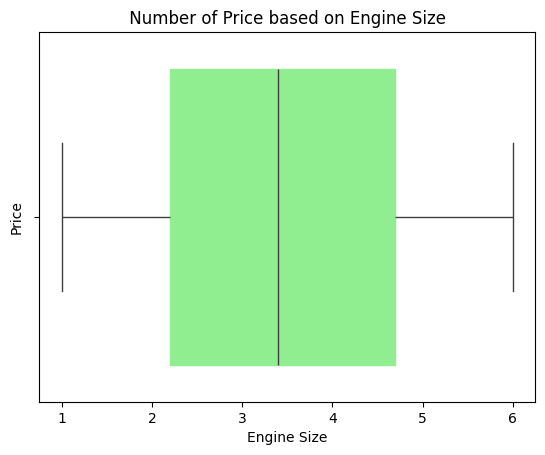

In [534]:
#Q10

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=ds['Engine Size'],boxprops={ 'color': 'lightgreen'})
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title(' Number of Price based on Engine Size ')
plt.show()

## **Creat a Histogram for dependent variable (Price) Vs Brand.**

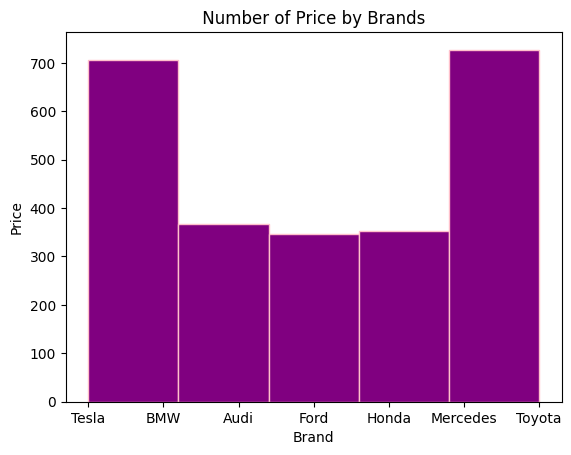

In [535]:
#Q10
import matplotlib.pyplot as plt


plt.hist(ds['Brand'],bins= 5 , edgecolor = 'Pink' , color= 'Purple')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title(' Number of Price by Brands ')
plt.show()



## **Creat a HeatMap for dependent variable (Price) based on Transmission Vs Engine Size.**

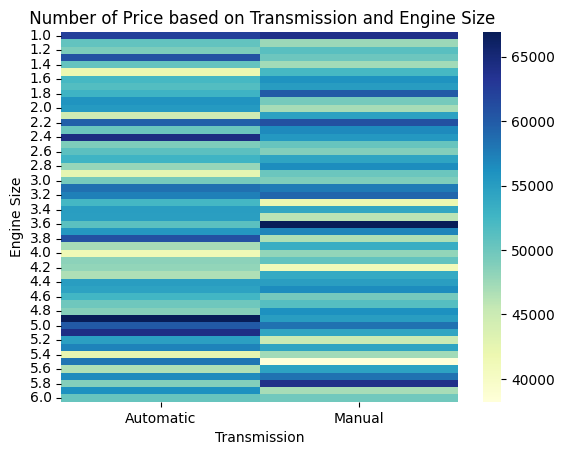

In [536]:
#Q10
import seaborn as sns

pivot_table= ds.pivot_table(index= 'Engine Size', columns = 'Transmission', values ='Price')


sns.heatmap(pivot_table, cmap='YlGnBu')
plt.xlabel('Transmission')
plt.ylabel('Engine Size')
plt.title(' Number of Price based on Transmission and Engine Size')
plt.show()


## **Creat a Scatter Plot for dependent variable (price) Vs Mileage .**

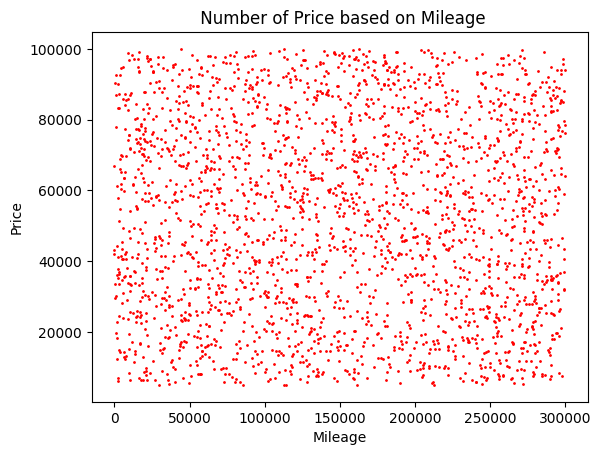

In [537]:
#Q10
import matplotlib.pyplot as plt

ds.plot.scatter(x='Mileage', y='Price', s=1 ,c = 'red')

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title(' Number of Price based on Mileage')
plt.show()

## **Hypothesis Testing**

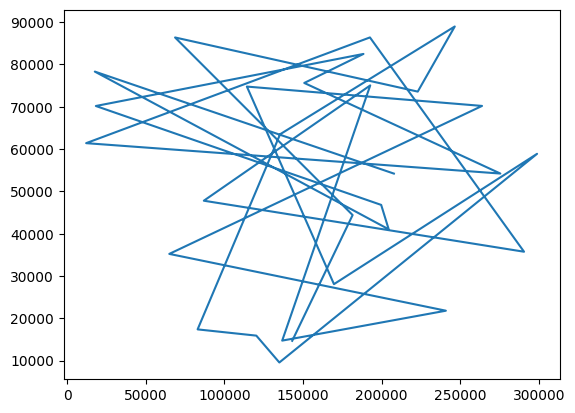

In [538]:
#Q11
# There is an assumption at car price  the car that mileage higer  steps  the price will be low.
import matplotlib.pyplot as plt

Mileage = ds[1:30]['Mileage']
Price = ds[1:30]['Price']
plt.plot(Mileage,Price)
plt.show()



In [539]:
#Spearman Rank Correlation numerical variable
from scipy.stats import spearmanr
r , p= spearmanr(ds['Mileage'], ds['Price'])
print('r=%.3f , p=%5f' % (r,p))
if p > 0.05:
  print('Independent')
else:
  print('Dependent')

  #personr Rank Correlation numerical variable
from scipy.stats import pearsonr
r , p= pearsonr(ds['Mileage'], ds['Price'])
print('r=%.3f , p=%5f' % (r,p))
if p > 0.05:
  print('Independent')
else:
  print('Dependent')

r=-0.008 , p=0.686886
Independent
r=-0.009 , p=0.668531
Independent


In [540]:

ds =pd.read_csv('car_price_prediction_.csv')

contingency_data = pd.crosstab(ds['Condition'], ds['Brand'],margins = False)
print(contingency_data)

Brand      Audi  BMW  Ford  Honda  Mercedes  Tesla  Toyota
Condition                                                 
Like New    111  138   124    123       110    121     109
New         129  104   113    109       115    119     120
Used        128  116   110    120       128    108     145


In [541]:
from scipy.stats import chi2_contingency
r, p, dof, expected = chi2_contingency(contingency_data)
print('r=%.3f, p=%.3f' % (r, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')
print('r=%.3f, p=%.3f' % (r, p))
if p > 0.05: print('independent categories')
else: print('dependent categories')

r=14.936, p=0.245
independent categories
r=14.936, p=0.245
independent categories


## **using a one-sample t-test to know whether the sample is representative of the normal population.**

In [542]:
#Q12

# Find the average of Car Price for all Brands(population).

price=ds['Price'].mean()
price

# Extract Car Price for Mercedes(sample-stratified).

mercedes_price = ds[ds['Brand']=='Mercedes']
mercedes_price['Price']

# Check for normality

# Find the average of Car Price for all Brands(population).

price=ds['Price'].mean()
price

# Extract Car Price for Mercedes(sample-stratified).

mercedes_price = ds[ds['Brand']=='Mercedes']
mercedes_price['Price']

# Check for normality

from scipy.stats import shapiro
r , p = shapiro(ds['Price'])
print('r=%.2f , p=%.30f' % (r,p))
if p > 0.05:
  print('Normal distribution')
else:
    print('Not a Normal distribution')

print()

# One Sample T-test

import scipy
scipy.stats.ttest_ind(mercedes_price['Price'],ds['Price'])

r=0.95 , p=0.000000000000000000000000002760
Not a Normal distribution



TtestResult(statistic=0.3546390806502651, pvalue=0.7228862239115357, df=2851.0)

# Data Pre-Processing

In [543]:
#importaing the data set
dataset = pd.read_csv('car_price_prediction_.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_copy = X.copy()


In [544]:
print(X)

[[1 'Tesla' 2016 ... 114832 'New' 'Model X']
 [2 'BMW' 2018 ... 143190 'Used' '5 Series']
 [3 'Audi' 2013 ... 181601 'New' 'A4']
 ...
 [2498 'Ford' 2021 ... 272827 'Like New' 'Fiesta']
 [2499 'Audi' 2002 ... 229164 'Like New' 'Q5']
 [2500 'Toyota' 2005 ... 80978 'Used' 'RAV4']]


In [545]:
print(y)

[26613.92 14679.61 44402.61 ... 29902.45 46085.67 16594.14]


# Encoding categorical data

In [546]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5,7,8])], remainder='passthrough')
X_transformed = ct.fit_transform(X)
X_transformed = X_transformed.toarray()


In [547]:
print(X)

[[1 'Tesla' 2016 ... 114832 'New' 'Model X']
 [2 'BMW' 2018 ... 143190 'Used' '5 Series']
 [3 'Audi' 2013 ... 181601 'New' 'A4']
 ...
 [2498 'Ford' 2021 ... 272827 'Like New' 'Fiesta']
 [2499 'Audi' 2002 ... 229164 'Like New' 'Q5']
 [2500 'Toyota' 2005 ... 80978 'Used' 'RAV4']]


## **Using Simple Regression**

In [548]:
#Q13

#import the dataset
ds = pd.read_csv('car_price_prediction_.csv')
# split the data set into  independent columns Mileage
X = ds.iloc[:, [6]].values
# split the data set into dependent column price
y = ds.iloc[:, -1].values

print(X)

[[114832]
 [143190]
 [181601]
 ...
 [272827]
 [229164]
 [ 80978]]


In [549]:
print(y)

[26613.92 14679.61 44402.61 ... 29902.45 46085.67 16594.14]


In [550]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# 500 for the test_size and the rest is train_size

In [551]:
#Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [552]:

y_pred = regressor.predict(X_test)
print(X_test)
print(y_pred)

[[147733]
 [ 38059]
 [185846]
 [277845]
 [ 40391]
 [206089]
 [281315]
 [238217]
 [134476]
 [ 62598]
 [ 88771]
 [145921]
 [ 97551]
 [ 40308]
 [182155]
 [229303]
 [ 61477]
 [  6021]
 [ 97841]
 [207627]
 [190330]
 [273139]
 [ 49648]
 [ 15021]
 [179480]
 [278203]
 [130963]
 [237469]
 [ 55063]
 [290144]
 [ 95424]
 [ 56879]
 [213739]
 [193529]
 [243722]
 [ 13672]
 [124555]
 [210084]
 [ 79794]
 [ 39023]
 [297194]
 [ 21292]
 [232321]
 [ 59030]
 [ 98385]
 [ 75010]
 [   997]
 [ 27676]
 [103431]
 [  7758]
 [292157]
 [  5695]
 [280412]
 [270114]
 [109268]
 [218115]
 [108668]
 [ 33717]
 [120827]
 [ 42103]
 [ 76394]
 [288927]
 [297429]
 [254451]
 [ 50304]
 [293427]
 [226812]
 [ 69812]
 [229728]
 [215838]
 [ 81462]
 [ 43555]
 [295531]
 [297019]
 [ 44783]
 [275659]
 [  3192]
 [ 23086]
 [ 10547]
 [286608]
 [ 69852]
 [294458]
 [137687]
 [130509]
 [ 27268]
 [263272]
 [225075]
 [243181]
 [ 36355]
 [ 61600]
 [223023]
 [103700]
 [ 63528]
 [181880]
 [204705]
 [113920]
 [279275]
 [ 55781]
 [ 36282]
 [220521]


In [553]:
#car id 4
regressor.predict([[68682]])

array([53013.32])

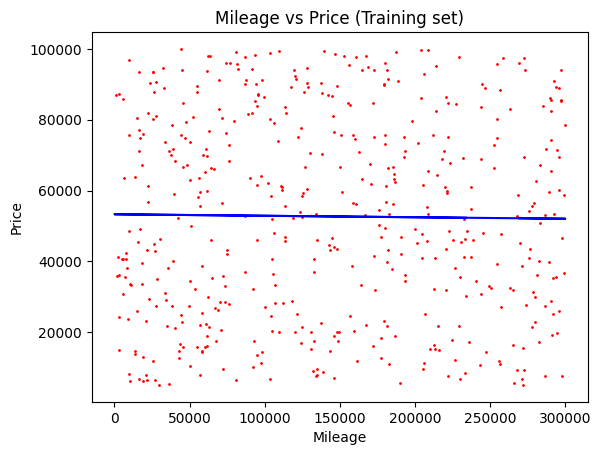

In [554]:
plt.scatter(X_test, y_test, color = 'red',s=1)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Mileage vs Price (Training set)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


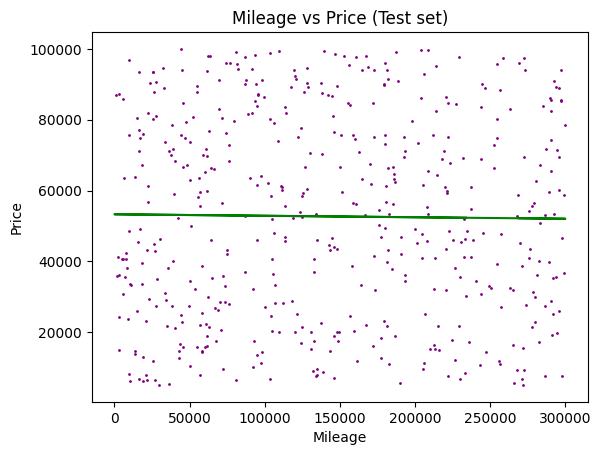

In [555]:
plt.scatter(X_test, y_test, color = 'purple', s= 1)
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Mileage vs Price (Test set)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


In [556]:
print(regressor.coef_)
print(regressor.intercept_)


[-0.]
53300.801822434936


In [557]:
#encode categorical variable Brand
from sklearn.preprocessing import OneHotEncoder
BrandAfter= OneHotEncoder (handle_unknown='ignore' ,sparse_output=False) # Change Sparse_output to sparse_output
BrandAfter = BrandAfter.set_output(transform='pandas')
BrandAftertransform=BrandAfter.fit_transform(ds[['Brand']])
BrandAftertransform

,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2495,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2498,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [558]:
#encode categorical variable Fuel Type
from sklearn.preprocessing import OneHotEncoder
FuelAfter= OneHotEncoder (handle_unknown='ignore' ,sparse_output=False) # Change Sparse_output to sparse_output
FuelAfter = FuelAfter.set_output(transform='pandas')
FuelAftertransform=FuelAfter.fit_transform(ds[['Fuel Type']])
FuelAftertransform

,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
2495,0.0,0.0,0.0,1.0
2496,0.0,0.0,1.0,0.0
2497,0.0,0.0,1.0,0.0
2498,1.0,0.0,0.0,0.0


In [559]:
#encode categorical variable Transmission
from sklearn.preprocessing import OneHotEncoder
TranAfter= OneHotEncoder (handle_unknown='ignore' ,sparse_output=False) # Change Sparse_output to sparse_output
TranAfter = TranAfter.set_output(transform='pandas')
TranAftertransform=TranAfter.fit_transform(ds[['Transmission']])
TranAftertransform

,Transmission_Automatic,Transmission_Manual
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
2495,1.0,0.0
2496,0.0,1.0
2497,0.0,1.0
2498,0.0,1.0


In [560]:
#encode categorical variable Condition
from sklearn.preprocessing import OneHotEncoder
CondAfter= OneHotEncoder (handle_unknown='ignore' ,sparse_output=False) # Change Sparse_output to sparse_output
CondAfter = CondAfter.set_output(transform='pandas')
CondAftertransform=TranAfter.fit_transform(ds[['Condition']])
CondAftertransform

,Condition_Like New,Condition_New,Condition_Used
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
2495,1.0,0.0,0.0
2496,1.0,0.0,0.0
2497,1.0,0.0,0.0
2498,1.0,0.0,0.0


In [561]:
#encode categorical variable Model
from sklearn.preprocessing import OneHotEncoder
ModelAfter= OneHotEncoder (handle_unknown='ignore' ,sparse_output=False) # Change Sparse_output to sparse_output
ModelAfter = ModelAfter.set_output(transform='pandas')
ModelAftertransform=TranAfter.fit_transform(ds[['Model']])
ModelAftertransform

,Model_3 Series,Model_5 Series,Model_A3,Model_A4,Model_Accord,Model_C-Class,Model_CR-V,Model_Camry,Model_Civic,Model_Corolla,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [562]:
# connect the encoding categorical
ds = pd.concat([ds, BrandAftertransform], axis=1)
ds = pd.concat([ds, FuelAftertransform], axis=1)
ds = pd.concat([ds, TranAftertransform], axis=1)
ds = pd.concat([ds, CondAftertransform], axis=1)
ds = pd.concat([ds, ModelAftertransform], axis=1)

BrandAftertransform.reset_index(inplace=True)
FuelAftertransform.reset_index(inplace=True)
TranAftertransform.reset_index(inplace=True)
CondAftertransform.reset_index(inplace=True)
ModelAftertransform.reset_index(inplace=True)


In [563]:
ds['Model'].unique()

array(['Model X', '5 Series', 'A4', 'Model Y', 'Mustang', 'Q7', 'Q5',
       'Civic', 'Explorer', 'Model 3', 'Fiesta', 'X3', 'GLA', 'A3', 'X5',
       'C-Class', 'E-Class', 'CR-V', 'Camry', 'Accord', 'GLC', 'Corolla',
       'Fit', 'Model S', 'Prius', '3 Series', 'RAV4', 'Focus'],
      dtype=object)

In [564]:
ds.drop(['Brand','Fuel Type','Transmission','Condition','Model'], axis=1, inplace=True)
ds

,Car ID,Year,Engine Size,Mileage,Price,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,1,2016,2.3,114832,26613.92,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,4.4,143190,14679.61,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2013,4.5,181601,44402.61,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2011,4.1,68682,86374.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2009,2.6,223009,73577.10,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,2020,2.4,22650,61384.10,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2496,2497,2001,5.7,77701,24710.35,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,2498,2021,1.1,272827,29902.45,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,2499,2002,4.5,229164,46085.67,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## **using multiple linear regression to predict the dependent variable based on all independent variables**


In [565]:
#Q14

#Load the data
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values
print(X)
print(y)

[[1.00e+00 2.02e+03 2.30e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 2.02e+03 4.40e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.01e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [2.50e+03 2.02e+03 1.10e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.60e+00 ... 0.00e+00 1.00e+00 0.00e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [566]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y ,test_size =0.2 , random_state = 1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[9.19e+02 2.01e+03 1.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.70e+03 2.00e+03 1.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [6.40e+02 2.01e+03 2.40e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [1.10e+03 2.02e+03 4.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.36e+02 2.02e+03 2.60e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.06e+03 2.00e+03 1.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]]
[[1407.  2001.     4.3 ...    0.     0.     0. ]
 [ 298.  2020.     4.2 ...    0.     0.     0. ]
 [1277.  2018.     3.9 ...    0.     0.     0. ]
 ...
 [ 675.  2013.     4.8 ...    0.     0.     0. ]
 [2310.  2019.     2.7 ...    0.     0.     0. ]
 [ 769.  2020.     5.7 ...    0.     0.     0. ]]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

In [567]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [568]:


y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[ 2.35e-14  0.00e+00]
 [ 1.00e+00  1.00e+00]
 [-2.45e-14  0.00e+00]
 [ 1.00e+00  1.00e+00]
 [ 4.24e-14  0.00e+00]
 [-3.34e-13  0.00e+00]
 [-1.39e-16  0.00e+00]
 [-6.38e-16  0.00e+00]
 [ 1.46e-13  0.00e+00]
 [-3.13e-13  0.00e+00]
 [-2.52e-13  0.00e+00]
 [-3.07e-13  0.00e+00]
 [-3.01e-13  0.00e+00]
 [ 3.72e-13  0.00e+00]
 [ 1.18e-13  0.00e+00]
 [-3.24e-13  0.00e+00]
 [ 2.88e-14  0.00e+00]
 [-7.78e-14  0.00e+00]
 [ 2.35e-13  0.00e+00]
 [ 1.58e-13  0.00e+00]
 [-3.92e-13  0.00e+00]
 [ 4.74e-13  0.00e+00]
 [ 1.71e-13  0.00e+00]
 [ 4.24e-13  0.00e+00]
 [-3.17e-13  0.00e+00]
 [ 5.03e-14  0.00e+00]
 [ 6.29e-14  0.00e+00]
 [ 3.99e-13  0.00e+00]
 [-2.10e-13  0.00e+00]
 [ 7.52e-15  0.00e+00]
 [ 9.99e-14  0.00e+00]
 [-1.35e-13  0.00e+00]
 [ 2.54e-13  0.00e+00]
 [-3.36e-13  0.00e+00]
 [ 3.23e-13  0.00e+00]
 [-5.13e-14  0.00e+00]
 [ 4.60e-13  0.00e+00]
 [-1.14e-13  0.00e+00]
 [-1.53e-13  0.00e+00]
 [ 1.00e+00  1.00e+00]
 [ 1.63e-13  0.00e+00]
 [-6.85e-14  0.00e+00]
 [ 3.57e-13  0.00e+00]
 [ 4.22e-13

In [569]:
# car id 1
regressor.predict ([[1, 2016, 2.3, 114832, 26613.92, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

array([-0.97])

In [570]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

In [571]:
print(regressor.coef_)
print(regressor.intercept_)

[-2.47e-20 -1.49e-15 -3.00e-15  4.03e-20 -6.65e-20 -1.38e-01  8.28e-01
 -1.38e-01 -1.38e-01 -1.38e-01 -1.38e-01 -1.38e-01  7.25e-13  7.62e-13
  6.66e-13  7.09e-13 -2.24e-13 -1.95e-13  5.20e-13  5.42e-13  4.79e-13
 -1.00e+00 -1.00e+00 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02
 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02
 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02
 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02 -3.45e-02 -1.00e+00]
0.17241379310595525


## **Using Logistic Regression**

In [572]:
#Q15

#Importing the dataset
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

print(x)
print(y)

[[1.00e+00 2.02e+03 2.30e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 2.02e+03 4.40e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.01e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [2.50e+03 2.02e+03 1.10e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.60e+00 ... 0.00e+00 1.00e+00 0.00e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [573]:
#Encode the categorical dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [574]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [575]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [576]:
#Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [577]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[601   0]
 [  0  24]]


1.0

In [578]:
#Predicting the value
#we predict car id 1
print(classifier.predict(sc.transform([[1, 2016, 2.3, 114832, 26613.92, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])))

[0]


K-Nearest Neighbors

In [579]:
#Q15

#Importing the dataset
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values
print(X)
print(y)

[[1.00e+00 2.02e+03 2.30e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 2.02e+03 4.40e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.01e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [2.50e+03 2.02e+03 1.10e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.60e+00 ... 0.00e+00 1.00e+00 0.00e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [580]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [581]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [582]:
#Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [583]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[601   0]
 [  0  24]]


1.0

In [584]:
#Predicting the valueprint
print(classifier.predict(sc.transform([[1, 2016, 2.3, 114832, 26613.92, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])))


[0.]


## Naïve **Bayes**

In [585]:
#Q15

#Importing the dataset
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values
print(X)
print(y)

[[1.00e+00 2.02e+03 2.30e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 2.02e+03 4.40e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.01e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [2.50e+03 2.02e+03 1.10e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.60e+00 ... 0.00e+00 1.00e+00 0.00e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [586]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [587]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [588]:
#Training the NB model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [589]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[601   0]
 [  0  24]]


1.0

In [590]:
#Predicting the value
print(classifier.predict(sc.transform([[1, 2016, 2.3, 114832, 26613.92, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])))


[0.]


## **Decision Tree**

In [591]:
#Q15

#Importing the dataset
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values
print(X)
print(y)

[[1.00e+00 2.02e+03 2.30e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 2.02e+03 4.40e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.01e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [2.50e+03 2.02e+03 1.10e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.50e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+03 2.00e+03 4.60e+00 ... 0.00e+00 1.00e+00 0.00e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [592]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [593]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [594]:
#Training the DT model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [595]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[601   0]
 [  0  24]]


1.0

In [596]:
#Predicting the value
print(classifier.predict(sc.transform([[1, 2016, 2.3, 114832, 26613.92, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])))


[0.]


In [597]:
# Perform the cluster analysis such as K-means and Horizontal for any field from the chosen dataset.
X = dataset.iloc[:, [6,8]].values
print(X)

[[114832 'Model X']
 [143190 '5 Series']
 [181601 'A4']
 ...
 [272827 'Fiesta']
 [229164 'Q5']
 [80978 'RAV4']]


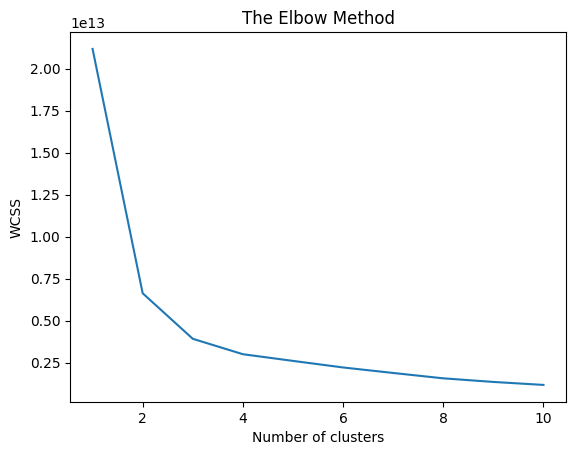

In [598]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Car price)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [599]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)



[2 2 0 ... 3 3 4]


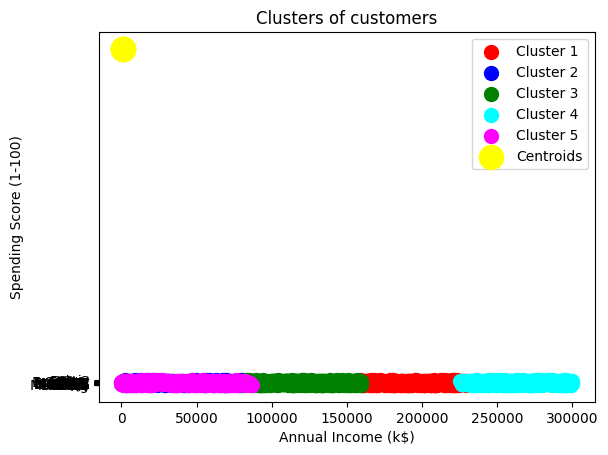

In [605]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

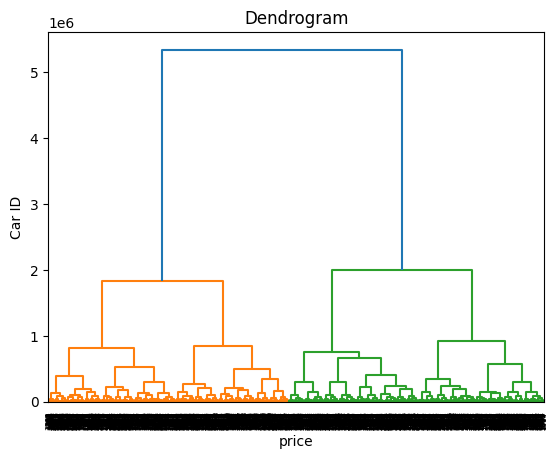

In [610]:

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('price')
plt.ylabel('Car ID')
plt.show()

In [607]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(x)

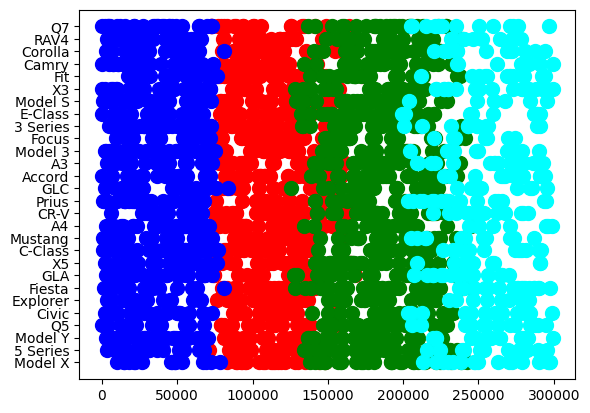

In [608]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')


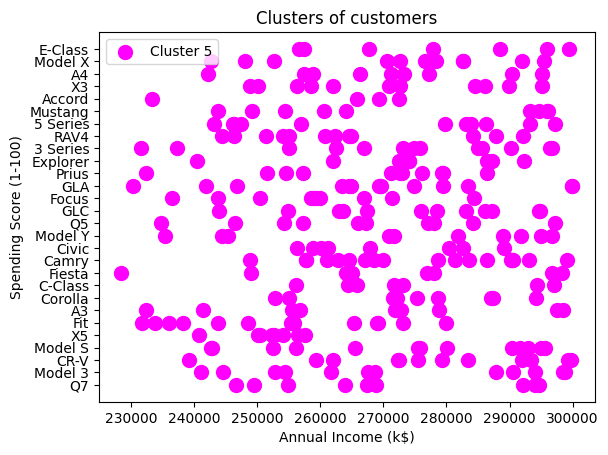

In [609]:
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()